In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
#turning the player data csv into pandas dataframe
df = pd.read_csv("player_stats.csv")
df = df.drop(labels = 'Rk',axis = 1)


In [20]:
df.head(1)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams\adamsst01,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9


In [21]:
positions = []
for i in df['Pos']:
    pos = 1 if i[:2] == 'PG' else 2 if 'SG' else 3 if 'SF' else 4 if 'PF' else 5 
    positions.append(pos)
df = df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P','3PA','3P%','FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS']]
df2 = df

df2['positions'] = positions

In [22]:
df = df.dropna()
df2 = df2.dropna()

# kmeans = KMeans(n_clusters=5, random_state=0).fit(df)

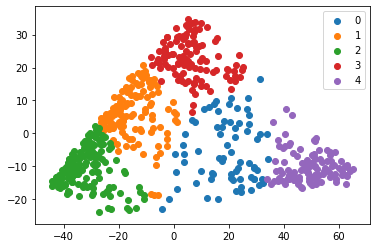

In [28]:

 
#Load Data

pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df2)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [29]:
pca.explained_variance_ratio_

array([0.81702668, 0.18297332])

In [25]:
df

array([[ 47.83584188,  -9.84992036],
       [ 62.90055077, -10.25598817],
       [ 37.99804507, -14.5347125 ],
       ...,
       [ 50.45617541, -15.7117149 ],
       [ 26.60632079,   0.80543049],
       [ 55.70796798,  -5.04358614]])

In [26]:
labels

array([4, 4, 4, 2, 2, 4, 0, 0, 0, 3, 4, 0, 4, 4, 3, 1, 2, 0, 3, 1, 2, 0,
       4, 3, 2, 4, 4, 4, 2, 2, 0, 0, 1, 3, 1, 2, 3, 4, 3, 2, 0, 3, 2, 2,
       0, 2, 0, 0, 0, 3, 1, 1, 3, 4, 4, 1, 4, 0, 0, 0, 0, 4, 4, 3, 2, 1,
       3, 0, 0, 0, 1, 4, 0, 0, 4, 4, 1, 0, 4, 3, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 2, 4, 2, 0, 0, 3, 0, 0, 0, 0, 3, 3, 1, 2, 3, 1, 0, 2, 0, 2,
       0, 3, 2, 0, 0, 3, 3, 2, 2, 0, 2, 0, 0, 1, 0, 1, 3, 2, 4, 1, 1, 2,
       2, 0, 1, 4, 1, 0, 1, 3, 0, 2, 2, 4, 3, 2, 2, 0, 3, 4, 2, 2, 3, 2,
       0, 4, 3, 4, 1, 2, 2, 2, 3, 4, 1, 0, 2, 1, 2, 2, 4, 3, 2, 0, 0, 2,
       2, 2, 0, 0, 1, 0, 1, 3, 2, 4, 4, 4, 4, 0, 0, 2, 4, 2, 0, 0, 4, 3,
       4, 1, 3, 1, 4, 2, 4, 2, 4, 2, 4, 3, 2, 0, 3, 0, 4, 1, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 0, 4, 4, 4, 1, 0, 3, 4, 4, 4, 2, 3, 0, 0, 3, 4, 2,
       2, 0, 0, 2, 2, 0, 2, 3, 3, 4, 3, 3, 2, 0, 0, 1, 4, 3, 3, 0, 4, 0,
       4, 3, 4, 4, 2, 1, 0, 3, 4, 4, 1, 1, 3, 3, 4, 0, 3, 2, 0, 0, 2, 4,
       0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 2, 2, 0, 4, 1,